### Manual(Ruler-Based) Multi-dimensional Quality Scoring Result (for evaluation)

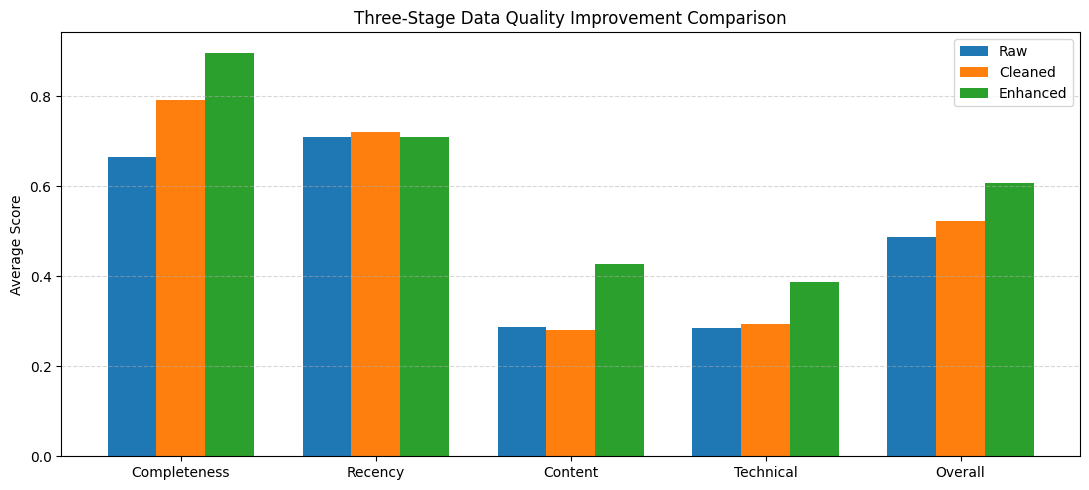

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt


# ===== Utilities =====
def load_scores(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)["summary"]


# ===== Load data =====
raw_scores = load_scores("quality_statistics_raw.json")
cleaned_scores = load_scores("quality_statistics_cleaned.json")
enhanced_scores = load_scores("quality_statistics_full_enhanced.json")

stages = ["Raw", "Cleaned", "Enhanced"]

metrics = [
    ("Completeness", "avg_completeness_score"),
    ("Recency", "avg_recency_score"),
    ("Content", "avg_content_quality"),
    ("Technical", "avg_technical_depth"),
    ("Overall", "overall_score"),
]

raw_values = [raw_scores[k] for _, k in metrics]
cleaned_values = [cleaned_scores[k] for _, k in metrics]
enhanced_values = [enhanced_scores[k] for _, k in metrics]


# ===== Plot =====
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(11, 5))

plt.bar(x - width, raw_values, width, label="Raw")
plt.bar(x, cleaned_values, width, label="Cleaned")
plt.bar(x + width, enhanced_values, width, label="Enhanced")

plt.xticks(x, [m[0] for m in metrics])
plt.ylabel("Average Score")
plt.title("Three-Stage Data Quality Improvement Comparison")
plt.legend()

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig("three_stage_quality_improvement_ruler_based.png", dpi=300)
plt.show()


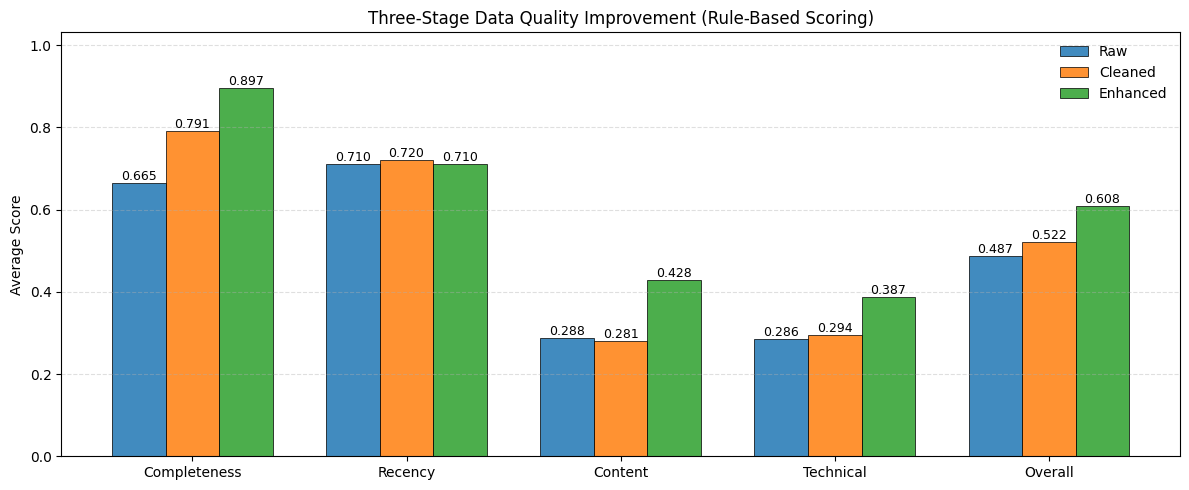

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt


# ===== Utilities =====
def load_scores(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)["summary"]


# ===== Load data =====
raw_scores = load_scores("quality_statistics_raw.json")
cleaned_scores = load_scores("quality_statistics_cleaned.json")
enhanced_scores = load_scores("quality_statistics_full_enhanced.json")

stages = ["Raw", "Cleaned", "Enhanced"]

metrics = [
    ("Completeness", "avg_completeness_score"),
    ("Recency", "avg_recency_score"),
    ("Content", "avg_content_quality"),
    ("Technical", "avg_technical_depth"),
    ("Overall", "overall_score"),
]

raw_values = [raw_scores[k] for _, k in metrics]
cleaned_values = [cleaned_scores[k] for _, k in metrics]
enhanced_values = [enhanced_scores[k] for _, k in metrics]


# ===== Plot =====
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12, 5))

bars_raw = plt.bar(
    x - width,
    raw_values,
    width,
    label="Raw",
    alpha=0.85,
    edgecolor="black",
    linewidth=0.6,
)

bars_cleaned = plt.bar(
    x,
    cleaned_values,
    width,
    label="Cleaned",
    alpha=0.85,
    edgecolor="black",
    linewidth=0.6,
)

bars_enhanced = plt.bar(
    x + width,
    enhanced_values,
    width,
    label="Enhanced",
    alpha=0.85,
    edgecolor="black",
    linewidth=0.6,
)

plt.xticks(x, [m[0] for m in metrics])
plt.ylabel("Average Score")
plt.title("Three-Stage Data Quality Improvement (Rule-Based Scoring)")
plt.legend(frameon=False)

plt.ylim(0, max(enhanced_values) * 1.15)

plt.grid(axis="y", linestyle="--", alpha=0.4)


# ===== Annotate values =====
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )


annotate_bars(bars_raw)
annotate_bars(bars_cleaned)
annotate_bars(bars_enhanced)

plt.tight_layout()
plt.savefig("three_stage_quality_improvement_ruler_based.png", dpi=300)
plt.show()


### Multi-dimensional Quality Scoring Result using LLM (for evaluation)

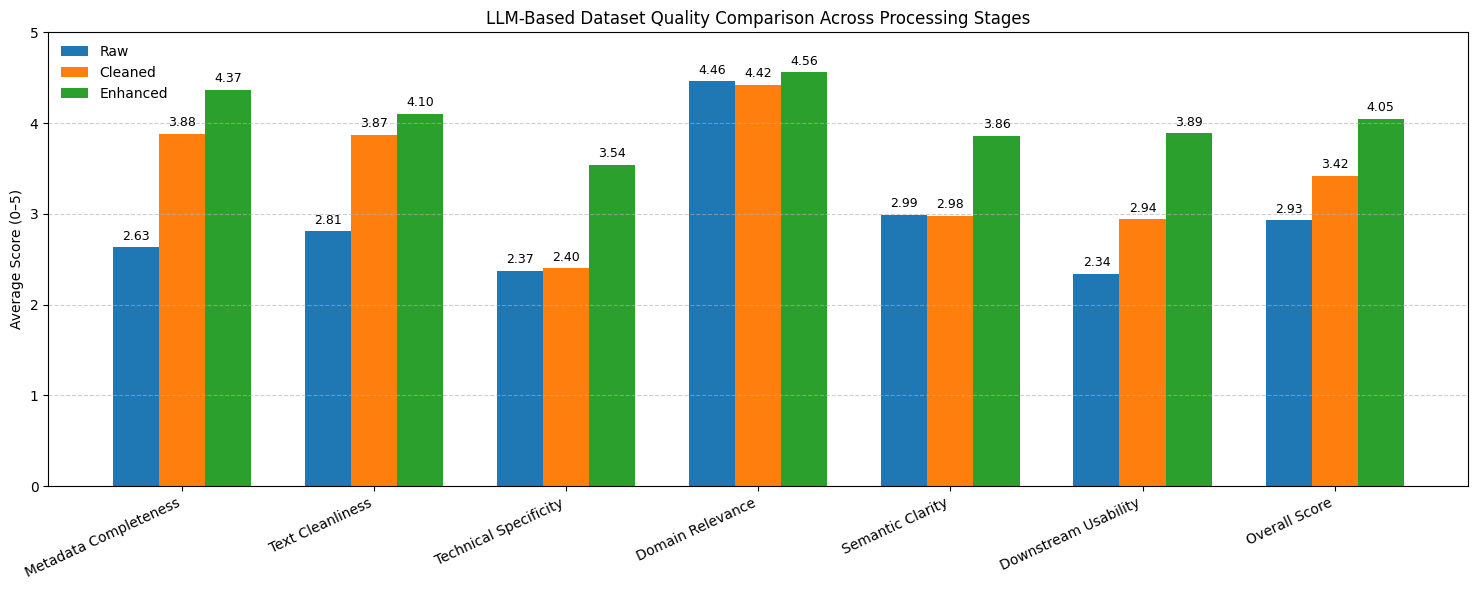

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np

def load_scores(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

# ===== Load data =====
raw_data = load_scores("llm_scores_raw.json")
cleaned_data = load_scores("llm_scores_cleaned.json")
enhanced_data = load_scores("llm_scores_full_enhanced.json")

datasets = [raw_data, cleaned_data, enhanced_data]
labels = ["Raw", "Cleaned", "Enhanced"]

score_keys = list(raw_data["scores"].keys())
metrics = [k.replace("_", " ").title() for k in score_keys]

raw_scores = [raw_data["scores"][k] for k in score_keys]
cleaned_scores = [cleaned_data["scores"][k] for k in score_keys]
enhanced_scores = [enhanced_data["scores"][k] for k in score_keys]

x = np.arange(len(metrics))
width = 0.24

# ===== Plot =====
plt.figure(figsize=(15, 6))

bars_raw = plt.bar(x - width, raw_scores, width, label="Raw")
bars_cleaned = plt.bar(x, cleaned_scores, width, label="Cleaned")
bars_enhanced = plt.bar(x + width, enhanced_scores, width, label="Enhanced")

plt.xticks(x, metrics, rotation=25, ha="right")
plt.ylabel("Average Score (0–5)")
plt.ylim(0, 5.0)
plt.title("LLM-Based Dataset Quality Comparison Across Processing Stages")

plt.legend(frameon=False)
plt.grid(axis="y", linestyle="--", linewidth=0.8, alpha=0.6)

# ===== Value annotations =====
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.05,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

annotate_bars(bars_raw)
annotate_bars(bars_cleaned)
annotate_bars(bars_enhanced)

plt.tight_layout()
plt.show()
